In [5]:
import pandas as pd

data = pd.read_csv('datasets/diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
from sklearn.model_selection import train_test_split

x = data.drop('Outcome', axis=1)
y = data['Outcome']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=0)

In [7]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=150 ,max_depth=8, criterion='entropy', random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

Accuracy:  81.25 %

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.83      0.87       144
           1       0.60      0.77      0.67        48

    accuracy                           0.81       192
   macro avg       0.76      0.80      0.77       192
weighted avg       0.84      0.81      0.82       192


Confusion Matrix:
 [[119  25]
 [ 11  37]]


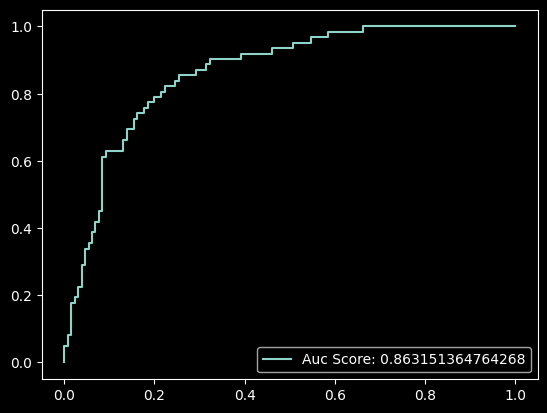

In [8]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

accuracy = accuracy_score(y_pred, y_test)
class_report = classification_report(y_pred, y_test)
conf_mtrx = confusion_matrix(y_pred, y_test)

print("Accuracy: ", accuracy*100, "%")
print("\nClassification Report:\n", class_report)
print("\nConfusion Matrix:\n", conf_mtrx)

import matplotlib.pyplot as plt

y_pred_proba = model.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.style.use("dark_background")
plt.plot(fpr, tpr, label=f"Auc Score: {auc}")
plt.legend(loc=4)
plt.show()